# Exploring Spatial Data

## Checking for the Existence of Data

* **Two types of paths**
    - System paths
    - Catalog paths
* **General syntax**
    - os.path.exists(<dataset>)
    - arcpy.Exists(<dataset>)


In [1]:
import os
os.path.exists(r"C:\Geog503\data\cities.shp")

True

In [2]:
import arcpy
arcpy.Exists(r"C:\Geog503\data\cities.shp")

True

In [3]:
import os
os.path.exists(r"C:\Geog503\data\testdata.gdb\buffers_poly")

False

In [4]:
import arcpy
arcpy.Exists(r"C:\Geog503\data\testdata.gdb\buffers_poly")

True

## Describing Data

* **The Describe function is used to determine properties of dataset**
* **General syntax**
    - import arcpy
    - < variable> = arcpy.Describe(< input dataset>)
* **Online help**
    - <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/describe.htm>


In [5]:
import arcpy
desc = arcpy.Describe(r"C:\Geog503\data\cities.shp")
print(desc.datatype)
print(desc.shapeType)

ShapeFile
Point


In [6]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data"
arcpy.env.overwriteOutput = True
infc = "railroads.shp"
clipfc = "new_mexico.shp"
# clipfc = "cities.shp"
outfc = "Results/railroads_clip.shp"
desc = arcpy.Describe(clipfc)
type = desc.shapeType
if type == "Polygon":
    arcpy.Clip_analysis(infc, clipfc, outfc)
    print("Clip analysis run successfully.")
else:
    print("The clip features are not polygons.")

Clip analysis run successfully.


In [7]:
import plotter
from osgeo import gdal
import os
import matplotlib.pyplot as plt
%matplotlib inline

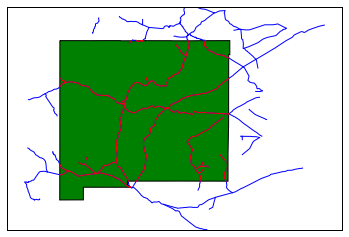

In [8]:
# Import VectorPlotter and change directories
from plotter.vectorplotter import VectorPlotter
workspace = r"C:\geog503\data"
os.chdir(workspace)

# Plot populated places on top of countries from an interactive session.
vp = VectorPlotter(True)
vp.plot('railroads.shp')
vp.plot('new_mexico.shp')
vp.plot('Results/railroads_clip.shp')

## The Describe function

* Describe function will always return a **Describe object**
* The Describe function returns a set of **generic properties** for all Describe objects.

<img style="float: left;" src="images/describe_function.png" width = 400>

* **Generic Describe Object Properties**

<img style="float: left;" src="images/generic_describe_props.png" width = 400>

In [19]:
import arcpy
data = r"C:\Geog503\data\cities.shp"
desc = arcpy.Describe(data)
print("baseName:    {}".format(desc.baseName))
print("catalogPath: {}".format(desc.catalogPath))
print("file:        {}".format(desc.file))
print("name:        {}".format(desc.name))
print("path:        {}".format(desc.path))
print("dataType:    {}".format(desc.dataType))
print("extension:   {}".format(desc.extension))

baseName:    cities
catalogPath: C:\geog503\data\cities.shp
file:        cities.shp
name:        cities.shp
path:        C:\geog503\data
dataType:    ShapeFile
extension:   shp


## Feature class Describe properties

<img style = "float: left;" src="images/fc_desc_props.png" width = 500>

### Feature Class properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/featureclass-properties.htm>

<img style = "float: left;" src="images/fc_props.png" width = 500>

In [18]:
import arcpy

# Create a Describe object from the feature class
desc = arcpy.Describe(r"C:\Geog503\data\cities.shp")

# Print some feature class properties
print("Feature Type:  {}".format(desc.featureType))
print("Shape Type :   {}".format(desc.shapeType))
print("Spatial Index: {}".format(desc.hasSpatialIndex))

Feature Type:  Simple
Shape Type :   Point
Spatial Index: True


### Table properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/table-properties.htm>

<img style="float: left;" src="images/table_props.png" width = 500>

In [22]:
import arcpy
# Create a Describe object from the table.
desc = arcpy.Describe(r"C:\Geog503\data\cities.shp")
# If the table has an OID, print the OID field name
if desc.hasOID:
    print("OIDFieldName: {}".format(desc.OIDFieldName))
# Print the names and types of all the fields in the table
for field in desc.fields:
    print("{:22} : {}".format(field.name,field.type))

OIDFieldName: FID
FID                    : OID
Shape                  : Geometry
CITIESX020             : Double
FEATURE                : String
NAME                   : String
POP_RANGE              : String
POP_2000               : Integer
FIPS55                 : String
COUNTY                 : String
FIPS                   : String
STATE                  : String
STATE_FIPS             : String
DISPLAY                : SmallInteger


### Dataset properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/dataset-properties.htm>

<img style="float: left;" src="images/dataset_props.png" width = 500>

In [25]:
import arcpy
desc = arcpy.Describe(r"C:\Geog503\data\new_mexico.shp")
print("Dataset Type: {0}".format(desc.datasetType))
print("Extent:\n  XMin: {0}, XMax: {1}, YMin: {2}, YMax: {3}".format(
    desc.extent.XMin, desc.extent.XMax, desc.extent.YMin, desc.extent.YMax))
print("Spatial reference name: {0}:".format(desc.spatialReference.name))

Dataset Type: FeatureClass
Extent:
  XMin: -109.050102234, XMax: -103.000656128, YMin: 31.3318996429, YMax: 36.9994239807
Spatial reference name: GCS_North_American_1983:


### Raster Describe properties

<img style="float: left;" src="images/raster_desc.png" width = 500>

### Raster Dataset properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/raster-dataset-properties.htm>

<img style="float: left;" src="images/raster_dataset_props.png" width = 500>

In [39]:
import arcpy
desc = arcpy.Describe(r"C:\Geog503\data\testdata.gdb\ElevationFloat")
print("{:20} {}".format("bandCount:",desc.bandCount))
print("{:20} {}".format("compressionType:",desc.compressionType))
print("{:20} {}".format("format:",desc.format))

bandCount:           1
compressionType:     NONE
format:              FGDBR


### Raster Band properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/raster-band-properties.htm>

<img style="float: left;" src="images/raster_band_props.png" width = 500>

In [47]:
import arcpy
desc = arcpy.Describe(r"C:\Geog503\data\testdata.gdb\ElevationFloat")
print("{:15} {}".format("height: ", desc.height))
print("{:15} {}".format("width:", desc.width))
print("{:15} {}".format("pixelType:", desc.pixelType))
print("{:15} {}".format("isInteger:", desc.isInteger))

height:         207
width:          233
pixelType:      F32
isInteger:      False


## Describing Data: Example

In [46]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data\testdata.gdb"
element = "buffers_poly"
desc = arcpy.Describe(element)
print("{:15} {}".format("Data type: ", desc.dataType))
print("{:15} {}".format("File path: ", desc.path))
print("{:15} {}".format("Catalog path: ", desc.catalogPath))
print("{:15} {}".format("File name: ", desc.file))
print("{:15} {}".format("Base name: ",desc.baseName))
print("{:15} {}".format("Name: ", desc.name))

Data type:      FeatureClass
File path:      C:\geog503\data\testdata.gdb
Catalog path:   C:\geog503\data\testdata.gdb\buffers_poly
File name:      buffers_poly
Base name:      buffers_poly
Name:           buffers_poly


## Describing a feature class and raster

You can use the Describe object **dataType** property to determine what is being described. Some of the values returned by the **dataType** property include:

* FeatureLayer
* FeatureClass
* File
* Folder
* LasDataset
* Layer
* MosaicDataset
* NetworkDataset
* RasterBand
* RasterDataset
* ShapeFile
* Table
* TextFile
* Toolbox

The complete list of dataType can be found at:
<http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/arcinfo-item-properties.htm>

The **hasattr()** function returns a Boolean value. An example of using the function with the Describe object is shown below.

In [56]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data\testdata.gdb"
element = "ElevationFloat"
# element = "buffers_poly"
desc = arcpy.Describe(element)
if hasattr(desc, "name"):
    print("Name: {}".format(desc.name))
if hasattr(desc, "bandCount"):
    print("Raster bands: {}".format(str(desc.bandCount)))
if hasattr(desc, "shapeType"):
    print("Shape type: {}".format(desc.shapeType))

Name: ElevationFloat
Raster bands: 1


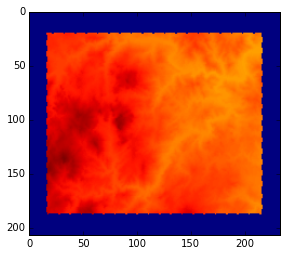

In [77]:
import arcpy
import matplotlib.pyplot as plt
arcpy.env.workspace = r"C:\Geog503\data\testdata.gdb"
image = arcpy.RasterToNumPyArray("ElevationInt")
plt.imshow(image,)
plt.show()

## List Data

* **Listing data is very common**
* **Several different list functions in ArcPy**
    - ListFields
    - ListIndexes
    - ListDataset
    - ListFeatureClasses
    - ListFiles
    - ListRasters
    - ListTables
    - ListWorkspaces
    - ListVersions
    
* **Similar logic:**
    - Create a list
    - Iterate over the list using a for loop
    
The complete list data functions can be found at <>http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/listdatasets.htm


### Listing Feature Classes

* **The ListFeatureClasses function returns a list of feature classes in the current workspace**
* **General syntax:**
    - ListFeatureClasses ({wild_card}, {feature_type}, {feature_dataset})
    
* **No filtering:**
    - fclist = arcpy.ListFeatureClasses()
* **Filtering based on wild card**
    - fclist = arcpy.ListFeatureClasses("c*")
* **Filtering based on feature type**
    - fclist = arcpy.ListFeatureClasses("", "point")


In [58]:
import arcpy
from arcpy import env 
env.workspace = r"C:\Geog503\data"
fclist = arcpy.ListFeatureClasses()
print(fclist)

[u'amtrak_stations.shp', u'cities.shp', u'counties.shp', u'new_mexico.shp', u'railroads.shp']


In [59]:
import arcpy
from arcpy import env 
env.workspace = r"C:\Geog503\data"
fclist = arcpy.ListFeatureClasses("*es.shp")
print(fclist)

[u'cities.shp', u'counties.shp']


## Listing Fields

* The **ListFields** function lists the fields in a feature class or table in a specified dataset.
* General syntax:
    - ListFields(dataset, {wild_card}, {field_type})


In [62]:
import arcpy
from arcpy import env
env.workspace = r"C:\Geog503\data"
fieldlist = arcpy.ListFields("cities.shp")
for field in fieldlist:
    print("{:15} : {}".format(field.name,field.type))

FID             : OID
Shape           : Geometry
CITIESX020      : Double
FEATURE         : String
NAME            : String
POP_RANGE       : String
POP_2000        : Integer
FIPS55          : String
COUNTY          : String
FIPS            : String
STATE           : String
STATE_FIPS      : String
DISPLAY         : SmallInteger


## Using Lists in for loops

The following script creates a list of fields of type String and determines for each text field what the length of the field is

In [64]:
import arcpy
from arcpy import env
env.workspace = r"C:\Geog503\data"
fieldlist = arcpy.ListFields("cities.shp","", "String")
for field in fieldlist:
    print("{:15} {}".format(field.name, str(field.length)))

FEATURE         27
NAME            48
POP_RANGE       21
FIPS55          5
COUNTY          55
FIPS            5
STATE           2
STATE_FIPS      2


The following script creates a list of TIFF files and iterates through each file in the list to build pyramids

In [65]:
import arcpy
from arcpy import env
env.workspace = r"C:\Geog503\data"
tifflist = arcpy.ListRasters("", "TIF" )
for tiff in tifflist:
    arcpy.BuildPyramids_management(tiff)

 ## Working with Dictionaries
 
* **Dictionaries consist of pairs of keys and values.**
* **Pairs are referred to as the items.**


In [74]:
capital = { }
capital["NY"] = "Albany"
capital["OH"] = "Columbus"
capital["CO"] = "Denver"
print(capital.keys())
print(capital.values())
print(capital.items())

['NY', 'CO', 'OH']
['Albany', 'Denver', 'Columbus']
[('NY', 'Albany'), ('CO', 'Denver'), ('OH', 'Columbus')]
